<h1>Importación de librerias</h1>

In [1]:
import os
import pandas as pd
from osgeo import gdal
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h3>Proceso de carga de datos en formato .TIF para poder ser manipulados y visualizados</h3>
<p>Creamos vectores donde almacenar los nombres de archivos</p>

In [2]:
dir = "Raster/SantoTome"
ficheros=[]
nombre=[]

<p>Path de ficheros TIF para ordenarlos</p>

In [3]:
for file in os.listdir(dir):
        if file.endswith(".tif"):
            ficheros.append(os.path.join(dir, file))
            nombre.append(file.split('.')[0])

<p>Ordenamos por nombre la lista de ficheros y de nombres de ficheros<p>

In [4]:
sorted(ficheros)
sorted(nombre)

['Altitud',
 'Arcillas',
 'Arenas',
 'Carbonatos',
 'Carbono_Organico',
 'Carcavas',
 'Curvatura_Perfil',
 'Curvatura_Plana',
 'Distancia_Carreteras',
 'Factor_LS',
 'Geologia',
 'Limos',
 'Orientaciones',
 'Overland_Flow_Distance',
 'Pendiente',
 'Stream_Power_Index',
 'Topographic_Position_Index',
 'Topographic_Wetness_Index',
 'Unidades_Edaficas',
 'Usos_Del_Suelo']

<p>Creamos un Dataframe con el nombre de los TIF</p>

In [5]:
datos = pd.DataFrame(columns=nombre)

<p>Recoger tamaño de las imagenes TIF que vamos a tratar</p>

In [6]:
tif = gdal.Open(ficheros[1])
tif_band = tif.GetRasterBand(1)
x = tif_band.XSize
y = tif_band.YSize
print("Tamaño archivos cargados:",x,"x",y,"\n")

Tamaño archivos cargados: 1448 x 2082 



<p>Recorremos lista de ficheros. SOLO TRATAMOS LOS DATOS NO DATA -> -1</p>

In [7]:
contador = 0
for f in ficheros:
    n = nombre[contador]
    MDT = gdal.Open(f)
    
    # Patrones sin datos se incluyen como -1
    MDT.GetRasterBand(1).SetNoDataValue(-1)
    
    # Pasamos los datos a float
    band = MDT.GetRasterBand(1).ReadAsArray().astype(float)
    
    # Se desechan las dos primeras filas y columnas debido a calculos de borde
    band = band[1:y, 1:x]
    
    # Reconstruimos el array con el tamaño de filas x columnas
    x_recorte = x - 1
    y_recorte = y - 1
    band = np.reshape(band, x_recorte*y_recorte)
    
    # Estos serán nuestros datos
    datos[n] = band
    
    contador = contador + 1

<hr>
<h3>Proceso de visualización de datos (SIN TRATAR ni utilizar ENCODE, datos en crudo)</h3>

<h4>1. ALTITUD (Continua)</h4>
<p>Datos únicos: </p>

In [8]:
print(datos.Altitud.unique())

[482.02099609 481.85501099 481.70199585 ... 493.00900269 607.20001221
 629.35797119]


In [9]:
print("Máximo: ", max(datos.Altitud))
print("Mínimo: ", min(datos.Altitud))
print("Media: ", datos["Altitud"].mean())
print("STD: ", datos["Altitud"].std())


Máximo:  871.6500244140625
Mínimo:  400.0830078125
Media:  570.4105152074554
STD:  100.24645989903374


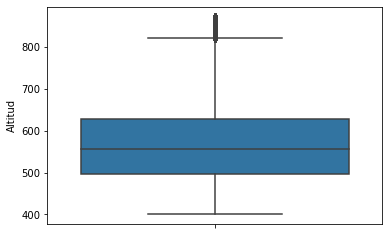

In [10]:
sns.boxplot( y=datos["Altitud"] );
plt.show()

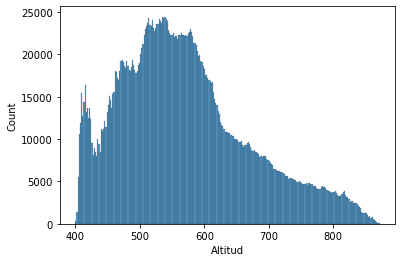

In [11]:
sns.histplot(data=datos, x="Altitud")
plt.show()

<hr>
<h4>2. ARCILLAS (Continua)</h4>
<p>Datos únicos: </p>

In [12]:
print(datos.Arcillas.unique())

[-3.40282347e+38  3.15290146e+01  3.85263672e+01  3.30586739e+01
  3.17581310e+01  3.68138924e+01  3.72075920e+01  4.00479622e+01
  3.16607933e+01  4.24358368e+01  4.02190437e+01  3.78495255e+01
  3.69504280e+01  3.22944374e+01  3.54302063e+01  3.61111755e+01
  3.50783920e+01  3.29157753e+01  3.33037796e+01  4.02662430e+01
  3.81022606e+01  4.01035004e+01  4.02132721e+01  3.84184570e+01
  3.36038628e+01  3.33245850e+01  3.43403511e+01  3.38872643e+01
  3.45824280e+01  3.19856739e+01  3.67185097e+01  3.92467384e+01
  3.48151627e+01  3.87457962e+01  3.74784927e+01  3.63343887e+01
  3.58559685e+01  3.82675133e+01  3.75632744e+01  3.44365692e+01
  3.14687157e+01  3.37616692e+01  3.69522133e+01  4.09927521e+01
  3.83467712e+01  3.72745667e+01  4.13126984e+01  3.06612015e+01
  3.76430702e+01  3.82193222e+01  3.30722771e+01  3.46028900e+01
  3.86561089e+01  3.60180130e+01  3.51722794e+01  3.50165634e+01
  3.74297714e+01  3.74436760e+01  3.21420937e+01  3.46155243e+01
  3.55192642e+01  3.53931

In [13]:
print("Máximo: ", max(datos.Arcillas))
print("Mínimo: ", min(datos.Arcillas))
print("Media: ", datos["Arcillas"].mean())
print("STD: ", datos["Arcillas"].std())

Máximo:  42.43583679199219
Mínimo:  -3.4028234663852886e+38
Media:  -1.3578388982650603e+38
STD:  1.6663614598712292e+38


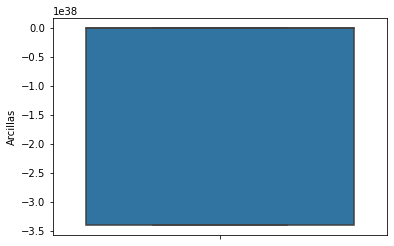

In [14]:
sns.boxplot( y=datos["Arcillas"] );
plt.show()

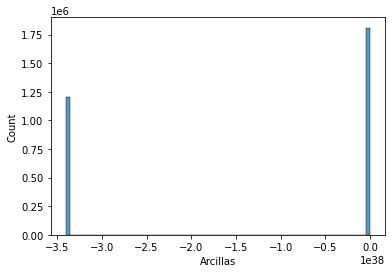

In [15]:
sns.histplot(data=datos, x="Arcillas")
plt.show()

<hr>
<h4>3. ARENAS (Continua)</h4>
<p>Datos únicos: </p>

In [16]:
print(datos.Arenas.unique())

[-3.40282347e+38  3.08518219e+01  2.03894424e+01  2.89576492e+01
  3.38757248e+01  1.77220154e+01  1.80632706e+01  1.28685379e+01
  3.28173676e+01  1.04003143e+01  1.43097992e+01  1.53459930e+01
  1.55555725e+01  2.13342896e+01  1.94634399e+01  1.93795853e+01
  2.47039032e+01  2.76778183e+01  1.99052048e+01  1.24207458e+01
  1.85113144e+01  1.06060944e+01  1.38734207e+01  1.74365387e+01
  1.52179871e+01  1.88594742e+01  1.92905807e+01  2.28324432e+01
  1.84550934e+01  1.93262482e+01  1.71563721e+01  1.71351318e+01
  2.55021667e+01  1.80482788e+01  1.72165222e+01  1.49434662e+01
  1.73463898e+01  1.54941101e+01  1.39888458e+01  2.10418625e+01
  2.21696777e+01  2.21203156e+01  1.80531998e+01  1.49806366e+01
  1.83043671e+01  1.55526428e+01  1.69387665e+01  2.51102676e+01
  2.10195770e+01  1.51963959e+01  2.42915192e+01  2.01652832e+01
  1.55953674e+01  1.78468628e+01  2.04451599e+01  1.75147781e+01
  1.63291702e+01  1.56714859e+01  2.57153015e+01  2.47651901e+01
  2.14310608e+01  2.18338

In [17]:
print("Máximo: ", max(datos.Arenas))
print("Mínimo: ", min(datos.Arenas))
print("Media: ", datos["Arenas"].mean())
print("STD: ", datos["Arenas"].std())

Máximo:  33.87572479248047
Mínimo:  -3.4028234663852886e+38
Media:  -1.3578388982650603e+38
STD:  1.6663614598712292e+38


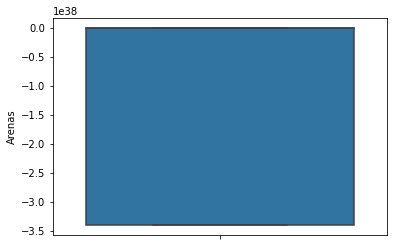

In [18]:
sns.boxplot( y=datos["Arenas"] );
plt.show()

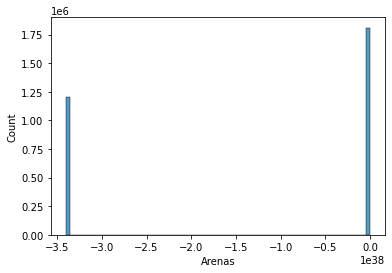

In [19]:
sns.histplot(data=datos, x="Arenas")
plt.show()

<hr>
<h4>4. CARBONATOS (Discreta)</h4>
<p>Datos únicos: </p>

In [20]:
print(datos.Carbonatos.unique())

[-3.40282347e+38  7.88117051e-01  1.79775369e+00  1.53975677e+00
  1.73969531e+00]


In [21]:
print("Máximo: ", max(datos.Carbonatos))
print("Mínimo: ", min(datos.Carbonatos))
print("Media: ", datos["Carbonatos"].mean())
print("STD: ", datos["Arenas"].std())

Máximo:  1.7977536916732788
Mínimo:  -3.4028234663852886e+38
Media:  -1.3578388982650603e+38
STD:  1.6663614598712292e+38


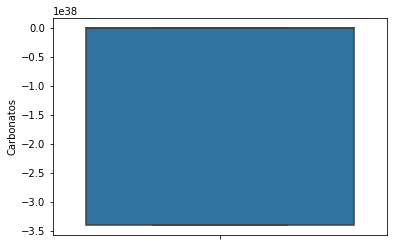

In [22]:
sns.boxplot( y=datos["Carbonatos"] );
plt.show()

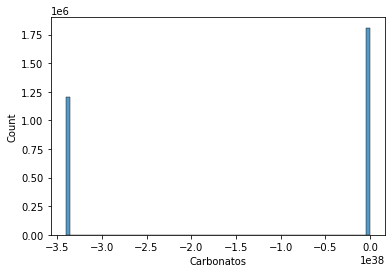

In [23]:
sns.histplot(data=datos, x="Carbonatos")
plt.show()

<hr>
<h4>4. CARBONO ORGÁNICO (Continua)</h4>
<p>Datos únicos: </p>

In [24]:
print(datos.Carbono_Organico.unique())

[-3.40282347e+38  2.09327560e+02  2.81533630e+02  2.74947937e+02
  2.85146698e+02  3.04396606e+02  3.08188019e+02  3.27469788e+02
  2.74494690e+02  3.90699249e+02  2.55464386e+02  2.31169144e+02
  3.17781067e+02  3.51975281e+02  5.01883453e+02  4.85076294e+02
  5.00494110e+02  1.92774124e+02  5.05907562e+02  4.37307404e+02
  2.44128860e+02  2.96196564e+02  3.35499634e+02  3.99753632e+02
  3.33859253e+02  5.38640259e+02  5.25030762e+02  5.20268188e+02
  4.76257111e+02  4.37479645e+02  1.65884277e+02  2.87093567e+02
  2.03477280e+02  3.27021423e+02  3.03421021e+02  2.63771729e+02
  2.44250244e+02  3.64995209e+02  3.90572815e+02  5.57084351e+02
  5.34846802e+02  5.14619873e+02  5.29630249e+02  4.20053925e+02
  4.18208832e+02  4.31642456e+02  2.93740204e+02  2.54610886e+02
  2.96706665e+02  2.47398483e+02  2.84728699e+02  2.65282471e+02
  3.31040985e+02  3.24390839e+02  3.50013489e+02  4.92186310e+02
  5.15671265e+02  4.98113525e+02  4.44076660e+02  4.41545410e+02
  4.07478760e+02  2.66162

In [25]:
print("Máximo: ", max(datos.Carbono_Organico))
print("Mínimo: ", min(datos.Carbono_Organico))
print("Media: ", datos["Carbono_Organico"].mean())
print("STD: ", datos["Carbono_Organico"].std())

Máximo:  576.9942626953125
Mínimo:  -3.4028234663852886e+38
Media:  -1.3578388982650603e+38
STD:  1.6663614598712292e+38


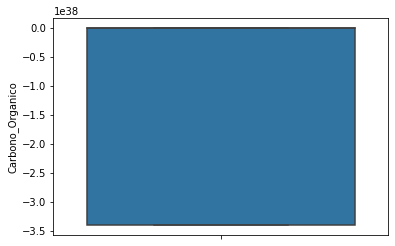

In [26]:
sns.boxplot( y=datos["Carbono_Organico"] );
plt.show()

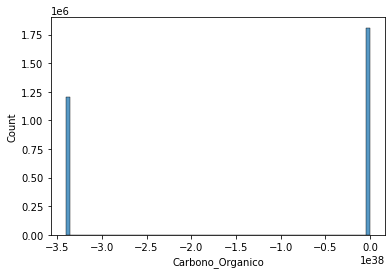

In [27]:
sns.histplot(data=datos, x="Carbono_Organico")
plt.show()

<hr>
<h4>5. CÁRCAVAS (Categórica)</h4>
<p>Datos únicos: </p>

In [28]:
print(datos.Carcavas.unique())

[-9.999e+03  0.000e+00  1.000e+00]


In [29]:
print("Máximo: ", max(datos.Carcavas))
print("Mínimo: ", min(datos.Carcavas))
print("Media: ", datos["Carcavas"].mean())
print("STD: ", datos["Carcavas"].std())

Máximo:  1.0
Mínimo:  -9999.0
Media:  -3989.913759499098
STD:  4896.5209224293985


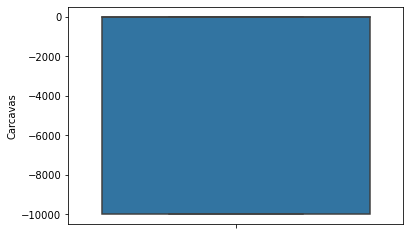

In [30]:
sns.boxplot( y=datos["Carcavas"] );
plt.show()

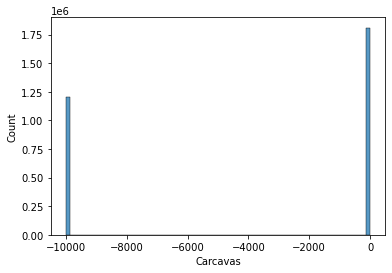

In [31]:
sns.histplot(data=datos, x="Carcavas")
plt.show()

<hr>
<h4>6. CURVATURA PERFIL (Continua)</h4>
<p>Datos únicos: </p>

In [32]:
print(datos.Curvatura_Perfil.unique())

[-0.00213784  0.00157105  0.0056141  ...  0.00195211 -0.00080891
  0.00040254]


In [33]:
print("Máximo: ", max(datos.Curvatura_Perfil))
print("Mínimo: ", min(datos.Curvatura_Perfil))
print("Media: ", datos["Curvatura_Perfil"].mean())
print("STD: ", datos["Curvatura_Perfil"].std())

Máximo:  0.3966639041900635
Mínimo:  -0.4562755525112152
Media:  -5.424772541450245e-05
STD:  0.015307355661837933


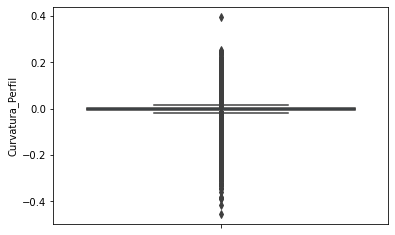

In [34]:
sns.boxplot( y=datos["Curvatura_Perfil"] );
plt.show()

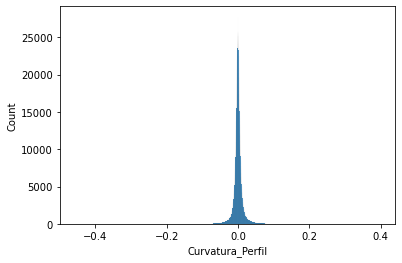

In [35]:
sns.histplot(data=datos, x="Curvatura_Perfil")
plt.show()

<hr>
<h4>7. CURVATURA PLANA (Continua)</h4>
<p>Datos únicos: </p>

In [36]:
print(datos.Curvatura_Plana.unique())

[ 0.05263381 -0.01046133  0.07128567 ...  0.04097901 -0.02419176
  0.01052479]


In [37]:
print("Máximo: ", max(datos.Curvatura_Plana))
print("Mínimo: ", min(datos.Curvatura_Plana))
print("Media: ", datos["Curvatura_Plana"].mean())
print("STD: ", datos["Curvatura_Plana"].std())

Máximo:  158.94403076171875
Mínimo:  -82.95050811767578
Media:  -0.00011647003319594896
STD:  0.25435482783495517


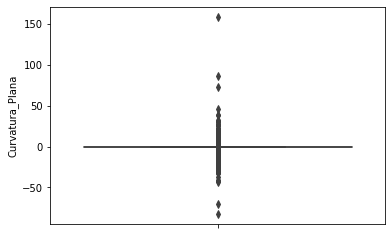

In [38]:
sns.boxplot( y=datos["Curvatura_Plana"] );
plt.show()

<hr>
<h4>8. DISTANCIA CARRETERAS (Continua)</h4>
<p>Datos únicos: </p>

In [39]:
print(datos.Distancia_Carreteras.unique())

[-3.40282306e+38  8.56460754e+02  8.56767151e+02 ...  1.40858081e+03
  1.41969189e+03  1.41263049e+03]


In [40]:
print("Máximo: ", max(datos.Distancia_Carreteras))
print("Mínimo: ", min(datos.Distancia_Carreteras))
print("Media: ", datos["Distancia_Carreteras"].mean())
print("STD: ", datos["Distancia_Carreteras"].std())

Máximo:  1731.7982177734375
Mínimo:  -3.4028230607370965e+38
Media:  -9.663669571821033e+37
STD:  1.5344417398553567e+38


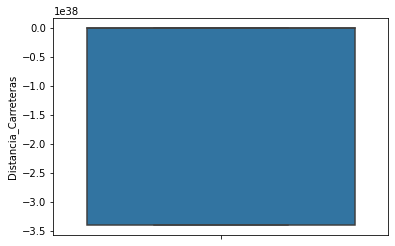

In [41]:
sns.boxplot( y=datos["Distancia_Carreteras"] );
plt.show()

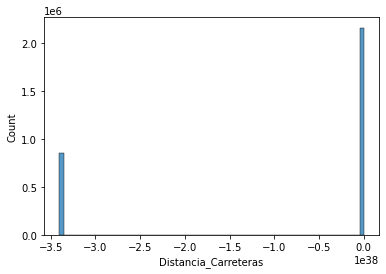

In [42]:
sns.histplot(data=datos, x="Distancia_Carreteras")
plt.show()

<hr>
<h4>9. FACTOR LS (Continua)</h4>
<p>Datos únicos: </p>

In [43]:
print(datos.Factor_LS.unique())

[-3.40282306e+38  5.79263151e-01  3.52780163e-01 ...  1.38589334e+00
  3.00449014e+00  2.35740876e+00]


In [44]:
print("Máximo: ", max(datos.Factor_LS))
print("Mínimo: ", min(datos.Factor_LS))
print("Media: ", datos["Factor_LS"].mean())
print("STD: ", datos["Factor_LS"].std())

Máximo:  109282.828125
Mínimo:  -3.4028230607370965e+38
Media:  -1.3641173100482262e+38
STD:  1.6676434655917078e+38


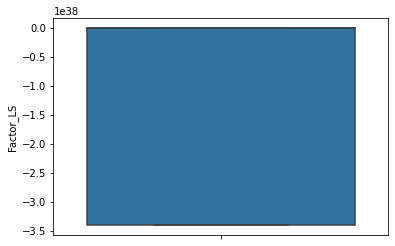

In [45]:
sns.boxplot( y=datos["Factor_LS"] );
plt.show()

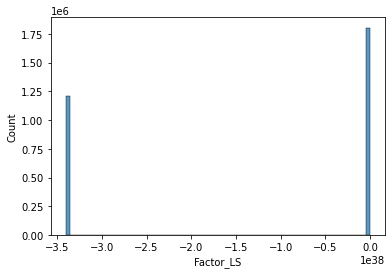

In [46]:
sns.histplot(data=datos, x="Factor_LS")
plt.show()

<hr>
<h4>10. GEOLOGIA (Categórica)</h4>
<p>Datos únicos: </p>

In [47]:
print(datos.Geologia.unique())

[0. 6. 4. 5. 2. 1. 3.]


In [48]:
print("Máximo: ", max(datos.Geologia))
print("Mínimo: ", min(datos.Geologia))
print("Media: ", datos["Geologia"].mean())
print("STD: ", datos["Geologia"].std())

Máximo:  6.0
Mínimo:  0.0
Media:  2.314115901032377
STD:  1.9488749029330645


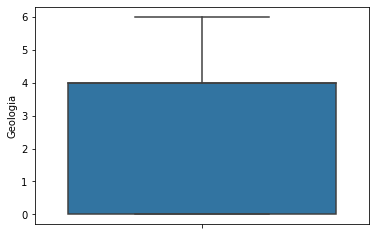

In [49]:
sns.boxplot( y=datos["Geologia"] );
plt.show()

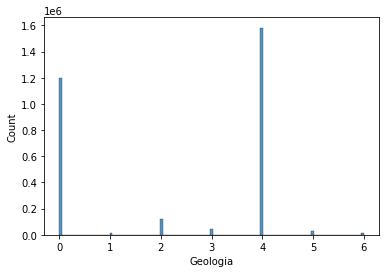

In [50]:
sns.histplot(data=datos, x="Geologia")
plt.show()

<hr>
<h4>11. LIMOS (Continua)</h4>
<p>Datos únicos: </p>

In [51]:
print(datos.Limos.unique())

[-3.40282347e+38  3.76191635e+01  4.10841904e+01  3.79836769e+01
  3.43661423e+01  4.54640923e+01  4.47291374e+01  4.70834999e+01
  3.55218353e+01  4.71638489e+01  4.54711571e+01  4.68044815e+01
  4.74939995e+01  4.63712730e+01  4.51063538e+01  4.45092392e+01
  4.02177048e+01  3.94064064e+01  4.67910156e+01  4.73130112e+01
  4.33864250e+01  4.92904053e+01  4.59133072e+01  4.41450043e+01
  5.11781502e+01  4.78159409e+01  4.63690681e+01  4.32802925e+01
  4.69624786e+01  4.86880798e+01  4.61251183e+01  4.36181297e+01
  3.96826706e+01  4.32059250e+01  4.53049850e+01  4.87221451e+01
  4.67976418e+01  4.62383766e+01  4.84478798e+01  4.45215683e+01
  4.63616066e+01  4.41180153e+01  4.49945869e+01  4.40266113e+01
  4.33488617e+01  4.71727905e+01  4.17485352e+01  4.42285309e+01
  4.13373528e+01  4.65842819e+01  4.26362038e+01  4.52318268e+01
  4.57485237e+01  4.61351242e+01  4.43825607e+01  4.74686584e+01
  4.62410583e+01  4.68848381e+01  4.21426048e+01  4.06192856e+01
  4.30496750e+01  4.27730

In [52]:
print("Máximo: ", max(datos.Limos))
print("Mínimo: ", min(datos.Limos))
print("Media: ", datos["Limos"].mean())
print("STD: ", datos["Limos"].std())

Máximo:  51.17815017700195
Mínimo:  -3.4028234663852886e+38
Media:  -1.3578388982650603e+38
STD:  1.6663614598712292e+38


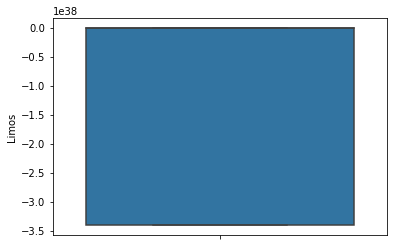

In [53]:
sns.boxplot( y=datos["Limos"] );
plt.show()

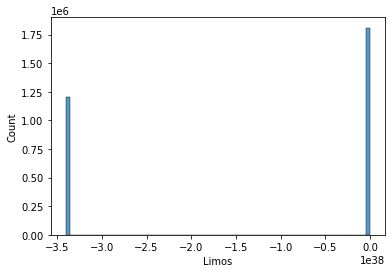

In [54]:
sns.histplot(data=datos, x="Limos")
plt.show()

<hr>
<h4>12. ORIENTACIONES (Categórica)</h4>
<p>Datos únicos: </p>

In [55]:
print(datos.Orientaciones.unique())

[4. 5. 6. 3. 7. 8. 2. 1. 0.]


In [56]:
print("Máximo: ", max(datos.Orientaciones))
print("Mínimo: ", min(datos.Orientaciones))
print("Media: ", datos["Orientaciones"].mean())
print("STD: ", datos["Orientaciones"].std())

Máximo:  8.0
Mínimo:  0.0
Media:  5.18578131626288
STD:  2.302248423014548


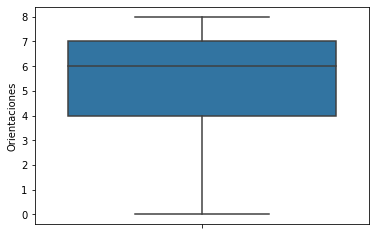

In [57]:
sns.boxplot( y=datos["Orientaciones"] );
plt.show()

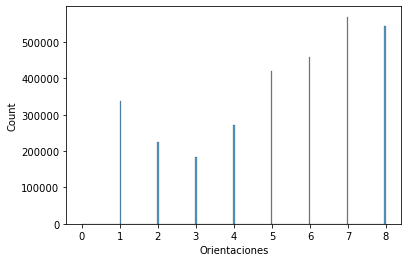

In [58]:
sns.histplot(data=datos, x="Orientaciones")
plt.show()

<hr>
<h4>13. OVERLAND FLOW DISTANCE (Continua)</h4>
<p>Datos únicos: </p>

In [59]:
print(datos.Overland_Flow_Distance.unique())

[1552.13659668 1544.10693359 1543.26257324 ... 1074.64135742 1079.18188477
 1084.32702637]


In [60]:
print("Máximo: ", max(datos.Overland_Flow_Distance))
print("Mínimo: ", min(datos.Overland_Flow_Distance))
print("Media: ", datos["Overland_Flow_Distance"].mean())
print("STD: ", datos["Overland_Flow_Distance"].std())

Máximo:  10661.609375
Mínimo:  0.0
Media:  2709.3435152745806
STD:  2206.8800229829512


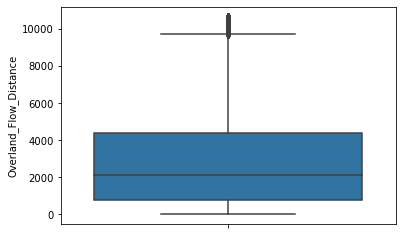

In [61]:
sns.boxplot( y=datos["Overland_Flow_Distance"] );
plt.show()

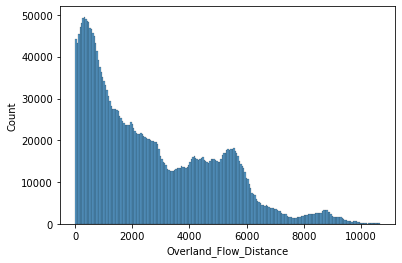

In [62]:
sns.histplot(data=datos, x="Overland_Flow_Distance")
plt.show()

<hr>
<h4>14. PENDIENTE (Continua)</h4>
<p>Datos únicos: </p>

In [63]:
print(datos.Pendiente.unique())

[ 4.06233358  4.23654413  4.6462841  ... 14.47701836 15.00549793
 16.23116684]


In [64]:
print("Máximo: ", max(datos.Pendiente))
print("Mínimo: ", min(datos.Pendiente))
print("Media: ", datos["Pendiente"].mean())
print("STD: ", datos["Pendiente"].std())

Máximo:  56.52096939086914
Mínimo:  -9999.0
Media:  -2.2133424241535224
STD:  342.3861554275828


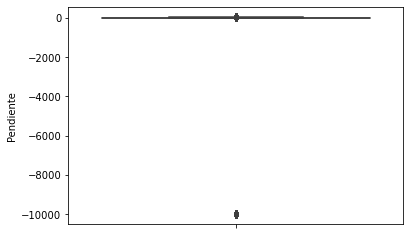

In [65]:
sns.boxplot( y=datos["Pendiente"] );
plt.show()

<hr>
<h4>15. STREAM POWER INDEX (Continua)</h4>
<p>Datos únicos: </p>

In [66]:
print(datos.Stream_Power_Index.unique())

[  40.78681946   71.3588028  -738.56268311 ... 1168.79064941 -321.52416992
 -137.0712738 ]


In [67]:
print("Máximo: ", max(datos.Stream_Power_Index))
print("Mínimo: ", min(datos.Stream_Power_Index))
print("Media: ", datos["Stream_Power_Index"].mean())
print("STD: ", datos["Stream_Power_Index"].std())

Máximo:  2013961472.0
Mínimo:  -40752812032.0
Media:  -13636.347361253693
STD:  23637509.868251957


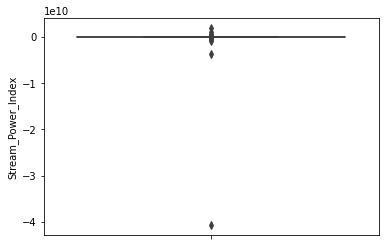

In [68]:
sns.boxplot( y=datos["Stream_Power_Index"] );
plt.show()

<hr>
<h4>16. TOPOGRAPHIC POSITION INDEX (Continua)</h4>
<p>Datos únicos: </p>

In [69]:
print(datos.Topographic_Position_Index.unique())

[ 4.19487143  4.15555239  4.11815596 ... -4.49704075 -4.2816
 -4.13515806]


In [70]:
print("Máximo: ", max(datos.Topographic_Position_Index))
print("Mínimo: ", min(datos.Topographic_Position_Index))
print("Media: ", datos["Topographic_Position_Index"].mean())
print("STD: ", datos["Topographic_Position_Index"].std())

Máximo:  27.74217414855957
Mínimo:  -26.37703514099121
Media:  0.002014578769190393
STD:  3.068650755611181


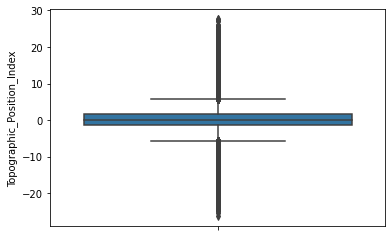

In [71]:
sns.boxplot( y=datos["Topographic_Position_Index"] );
plt.show()

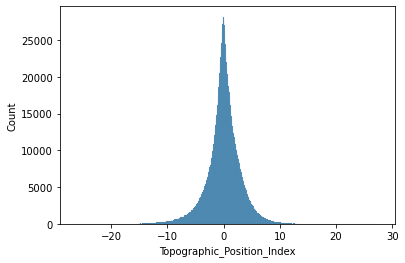

In [72]:
sns.histplot(data=datos, x="Topographic_Position_Index")
plt.show()

<hr>
<h4>17. TOPOGRAPHIC WETNESS INDEX (Continua)</h4>
<p>Datos únicos: </p>

In [73]:
print(datos.Topographic_Wetness_Index.unique())

[ 4.15572548  3.77308726 10.86683655 ...  4.74034357 12.16208267
 11.16511822]


In [74]:
print("Máximo: ", max(datos.Topographic_Wetness_Index))
print("Mínimo: ", min(datos.Topographic_Wetness_Index))
print("Media: ", datos["Topographic_Wetness_Index"].mean())
print("STD: ", datos["Topographic_Wetness_Index"].std())

Máximo:  20.535043716430664
Mínimo:  -10.7699556350708
Media:  9.59407034805544
STD:  3.8528257920284448


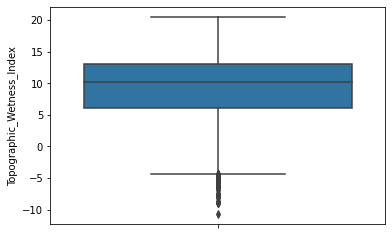

In [75]:
sns.boxplot( y=datos["Topographic_Wetness_Index"] );
plt.show()

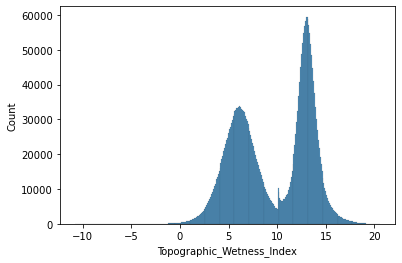

In [76]:
sns.histplot(data=datos, x="Topographic_Wetness_Index")
plt.show()

<hr>
<h4>18. UNIDADES EDÁFICAS (Categórica)</h4>
<p>Datos únicos: </p>

In [77]:
print(datos.Unidades_Edaficas.unique())

[-9999.    22.    48.    44.    23.]


In [78]:
print("Máximo: ", max(datos.Unidades_Edaficas))
print("Mínimo: ", min(datos.Unidades_Edaficas))
print("Media: ", datos["Unidades_Edaficas"].mean())
print("STD: ", datos["Unidades_Edaficas"].std())

Máximo:  48.0
Mínimo:  -9999.0
Media:  -3964.5030514341925
STD:  4918.840018798187


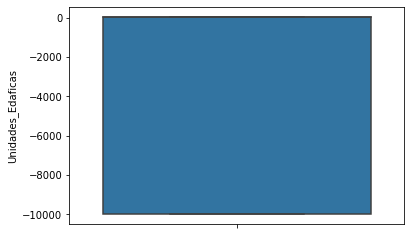

In [79]:
sns.boxplot( y=datos["Unidades_Edaficas"] );
plt.show()

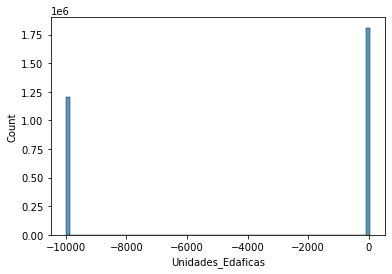

In [80]:
sns.histplot(data=datos, x="Unidades_Edaficas")
plt.show()

<hr>
<h4>19. USOS DEL SUELO (Categórica)</h4>
<p>Datos únicos: </p>

In [81]:
print(datos.Usos_Del_Suelo.unique())

[15.  3.  4.  2.  5.  1.]


In [82]:
print("Máximo: ", max(datos.Usos_Del_Suelo))
print("Mínimo: ", min(datos.Usos_Del_Suelo))
print("Media: ", datos["Usos_Del_Suelo"].mean())
print("STD: ", datos["Usos_Del_Suelo"].std())

Máximo:  15.0
Mínimo:  1.0
Media:  7.783762790136978
STD:  5.886714852245514


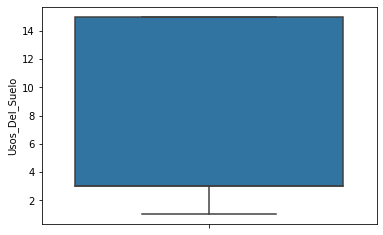

In [83]:
sns.boxplot( y=datos["Usos_Del_Suelo"] );
plt.show()

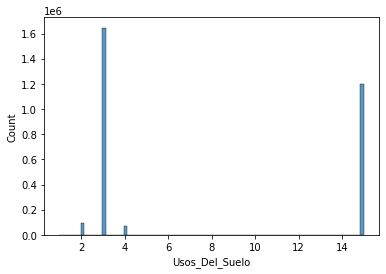

In [84]:
sns.histplot(data=datos, x="Usos_Del_Suelo")
plt.show()